In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

In [4]:
dataset_training = pd.read_csv('/content/drive/My Drive/all_dataset/stock_dataset/AMZN_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [5]:
training_data = dataset_training[['Open']].values
training_data

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled 

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.06523313],
        [0.06494233],
        [0.06355099],
        ...,
        [0.04147209],
        [0.03350041],
        [0.03173272]],

       [[0.06494233],
        [0.06355099],
        [0.06308912],
        ...,
        [0.03350041],
        [0.03173272],
        [0.03307274]],

       [[0.06355099],
        [0.06308912],
        [0.06504497],
        ...,
        [0.03173272],
        [0.03307274],
        [0.0306151 ]],

       ...,

       [[0.99080806],
        [0.97826323],
        [0.96783389],
        ...,
        [0.67319568],
        [0.60534525],
        [0.61839758]],

       [[0.97826323],
        [0.96783389],
        [0.94918773],
        ...,
        [0.60534525],
        [0.61839758],
        [0.66704299]],

       [[0.96783389],
        [0.94918773],
        [0.93150521],
        ...,
        [0.61839758],
        [0.66704299],
        [0.67796271]]])

Create & Compile an RNN Architecure 

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)

model = Sequential()

In [11]:
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100))

# Adding the output layer
model.add(Dense(units = 1))

In [12]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0191
Epoch 2/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0012
Epoch 3/100
38/38 [==============================] - 7s 179ms/step - loss: 9.8636e-04
Epoch 4/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0015
Epoch 5/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0011
Epoch 7/100
38/38 [==============================] - 7s 182ms/step - loss: 9.3201e-04
Epoch 8/100
38/38 [==============================] - 7s 185ms/step - loss: 8.7021e-04
Epoch 9/100
38/38 [==============================] - 7s 187ms/step - loss: 9.7092e-04
Epoch 10/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0010
Epoch 11/100
38/38 [==============================] - 7s 181ms/step - loss: 8.5824e-04
Epoch 12/100
38/38 [==============================] - 7s 181ms/step - loss: 

Prepare the Test Data , Concatenate Test &  Train Datasets

In [13]:
dataset_testing = pd.read_csv('/content/drive/My Drive/all_dataset/stock_dataset/AMZN_test.csv')
actual_stock_price = dataset_testing[['Open']].values
actual_stock_price

array([[1465.199951],
       [1520.01001 ],
       [1530.      ],
       [1602.310059],
       [1664.689941],
       [1652.97998 ],
       [1641.01001 ],
       [1640.550049],
       [1615.      ],
       [1632.      ],
       [1684.219971],
       [1680.      ],
       [1712.      ],
       [1681.      ],
       [1656.      ],
       [1641.069946],
       [1670.5     ],
       [1643.589966],
       [1631.27002 ],
       [1623.      ],
       [1692.849976]])

In [14]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the Results

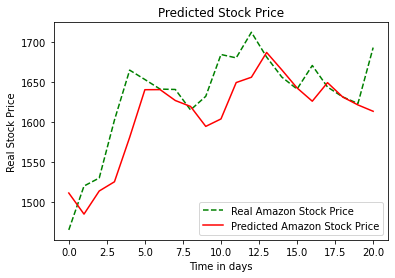

In [15]:
# Visualising the results
plt.plot(actual_stock_price, color = 'green', label = 'Real Amazon Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()